Master Version for the project. Includes some remnants from testing, as well as all components of the final code. These components also have their own distinct files for individual running.

In [ ]:
import numpy as np
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import time
import datetime as dt
from datetime import datetime as d2
from dateutil.relativedelta import relativedelta
import psycopg2
import pandas.io.sql as sqlio

In [ ]:
b = dt.datetime.now()
c = b.strftime("%Y-%m-%d")
d = b - relativedelta(years=3)
e = d.strftime("%Y-%m-%d")

In [ ]:
currency = 'USD'
currency_url = 'https://api.coindesk.com/v1/bpi/supported-currencies.json'
now_url = f'https://api.coindesk.com/v1/bpi/currentprice/{currency}.json'
time = d.strftime("%Y-%m-%d")
now = f'{dt.datetime.now():%Y-%m-%dT%H:%M:%SZ}'
time_url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={e}&end={c}&currency={currency}'
response1 = requests.get(currency_url)
response2 = requests.get(now_url)
response3 = requests.get(time_url)
print(time_url)

https://api.coindesk.com/v1/bpi/historical/close.json?start=2020-08-29&end=2023-08-29&currency=USD


In [ ]:
while True:
  response2 = requests.get(url)
  text = response2.json()
  pprint(text["bpi"]["USD"]["rate"])
  time.sleep(60)


In [ ]:
text = response2.json()
pprint(text)
pprint('...............')
pprint(type(text['bpi']))
pprint('...............')
pprint(text["bpi"][f"{currency}"])
pprint('...............')
print(text["bpi"][f'{currency}']["rate"])

In [ ]:
text = response3.json()
#pprint(text['bpi'])
#pprint('...............')

In [ ]:
sum(map(len, text.values()))

394

By default, the historical tag collects both date and value. The following list collects these, then splits them, then outputs the value into a list

In [ ]:
n_list = list(text['bpi'])
m = []
for s in n_list:
  m += s.split(',')
rate = []
for i in m:
  rate.append(text['bpi'][i])
rate

In [ ]:
del df_test

In [ ]:
df_test = pd.DataFrame(m)
#df_test['rate'] = rate
df_test

In [ ]:
temp = [dt.datetime.now()- relativedelta(years = 2) + datetime.timedelta(days=x) for x in range(sum(map(len, text.values())))]
for i in range(sum(map(len, text.values()))):
  temp[i] = temp[i].strftime("%Y-%m-%d")


In [ ]:
temp = [dt.datetime.now()- relativedelta(years = 2) + datetime.timedelta(days=x) for x in range(sum(map(len, text.values())))]
for i in range(sum(map(len, text.values()))):
  temp[i] = temp[i].strftime("%Y-%m-%d")
new = []
for i in temp:
  try:
    new += text['bpi'], i.get(text['bpi'][i],'None')
  except AttributeError:
   continue
  new

Collect supported currencies and their associated codes

In [ ]:
response1.json()

In [ ]:
code = response1.json()
currency_code = []
for i,j in enumerate(code):
  currency_code.append([code[i]['country'], code[i]['currency']][1])
currency_code

Full test data script

In [ ]:
#Initialise time variables
b = dt.datetime.now()
c = b.strftime("%Y-%m-%d")
d = b - relativedelta(years=3)
e = d.strftime("%Y-%m-%d")

#Generate timestamp list
stamp_url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={e}&end={c}'
response4 = requests.get(stamp_url)
temp = response4.json()
date_list = list(temp['bpi'])
timestamp = []
for s in date_list:
  timestamp += s.split(',')

#Create dataframe from timestamps
#el df_time
df_time = pd.DataFrame({'date':timestamp})

#Pull data for all languages and insert into dataframe
currency_url = 'https://api.coindesk.com/v1/bpi/supported-currencies.json'
currency_aba = []
time_url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={e}&end={c}&currency={currency_aba}'
response1 = requests.get(currency_url)
code = response1.json()

#for i,j in enumerate(code):
  #currency_code.append([code[i]['country'], code[i]['currency']][1])
#currency_code = currency_code.remove('XBT')
#currency_code = currency_code[:75]
currency_code = ['USD','GBP','JPY','RUB','AED']
for i in currency_code:
  currency_aba = i
  time_url = f'https://api.coindesk.com/v1/bpi/historical/close.json?start={e}&end={c}&currency={currency_aba}'
  response2 = requests.get(time_url)
  text = response2.json()
  n_list = list(text['bpi'])
  m = []
  for s in n_list:
    m += s.split(',')
  rate = []
  for i in m:
    rate.append(text['bpi'][i])
  df_time[f'{currency_aba}'] = rate


#Output dataframe to pagila database for long-term storage
conn = psycopg2.connect(host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
                        database = "pagila",
                        user="de8_dobu28",
                        password="JQmhe99+",
                        port=5432,
                        options='-c search_path=student')

cur = conn.cursor()

cur.execute("CREATE TABLE db_cap_datablock (date timestamp PRIMARY KEY, USD float, GBP float, JPY float, RUB float, AED float);")

print('SUCCESS!! Table has been created')

query="INSERT INTO db_cap_datablock (date, USD, GBP, JPY, RUB, AED) VALUES (%s, %s, %s, %s, %s, %s)"
record = df_time.to_records(index = False)
cur.executemany(query, record)

conn.commit()

cur.close()
conn.close()

SUCCESS!! Table has been created


Update script

In [ ]:
#Create table for long term storage

#conn = psycopg2.connect(host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
                      #  database = "pagila",
                      #  user="de8_dobu28",
                      #  password="JQmhe99+",
                      #  port=5432,
                      #  options='-c search_path=student')

#cur = conn.cursor()

#cur.execute("CREATE TABLE db_cap_databrick (date timestamp PRIMARY KEY, USD float, GBP float, JPY float, RUB float, AED float);")
#conn.commit()

#cur.close()
#conn.close()

In [ ]:
#Import modules
import pandas as pd
import requests
import psycopg2
import pandas.io.sql as sqlio

#Initialise update table
#del df_update
now_url = 'https://api.coindesk.com/v1/bpi/currentprice/USD.json'
response4 = requests.get(now_url)
temp = response4.json()
timestamp = [temp['time']['updatedISO'][:10]]
df_update = pd.DataFrame({'date':timestamp})

#Iterate over currencies and add to update table
currency_code = {'USD':'usd','GBP':'gbp','JPY':'jpy','RUB':'rub','AED':'aed'}
for i in range(0,len(currency_code)):
  currency_big = list(currency_code)[i]
  currency_small = list(currency_code.values())[i]
  now_url = f'https://api.coindesk.com/v1/bpi/currentprice/{currency_big}.json'
  response3 = requests.get(now_url)
  update = response3.json()
  price = update['bpi'][f'{currency_big}']['rate']
  df_update[f'{currency_small}'] = price

#Connect to pagila and add new values

conn = psycopg2.connect(host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
                        database = "pagila",
                        user="de8_dobu28",
                        password="JQmhe99+",
                        port=5432,
                        options='-c search_path=student')

cur = conn.cursor()

listabs = df_update.values.tolist()[0]
listabs = [j.replace(',', '') for j in listabs]
listbeta = [listabs[0]]
listabs = [float(i) for i in listabs[1:]]
for i in listabs:
  listbeta.append(i)
listabs = listbeta
query = 'INSERT INTO db_cap_databrick (date, usd, gbp, jpy, rub, aed) VALUES (%s,%s,%s,%s,%s,%s);'
record = (listabs[0],listabs[1],listabs[2],listabs[3],listabs[4],listabs[5])
#diff = df_diff.values.tolist()[0]
cur.execute(query,record)
conn.commit()

cur.close()
conn.close()

UniqueViolation: ignored

Connect to database and pull data

In [ ]:
conn = psycopg2.connect(host="data-sandbox.c1tykfvfhpit.eu-west-2.rds.amazonaws.com",
                        database = "pagila",
                        user="de8_dobu28",
                        password="JQmhe99+",
                        port=5432,
                        options='-c search_path=student')

cur = conn.cursor()

Datablock figures - bulk test data

<ipython-input-26-dcf9c017fb12>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = sqlio.read_sql_query("SELECT * FROM db_cap_datablock", conn)




Which currency would you like to check? Please use the uncapitalised code(i.e., "usd" for US Dollars). For a list of currencies, please type "code"  --  code

 {'usd': 'US Dollars ($)', 'gbp': 'British Pounds (£)', 'jpy': 'Japanese Yen (¥)', 'rub': 'Russian Ruble (₽)', 'aed': 'United Arab Emirates Dirham (درهم)'} 

Which currency would you like to check? Please use the uncapitalised code  --  aed


<Axes: title={'center': 'Bulk data -- United Arab Emirates Dirham (درهم)'}, xlabel='date', ylabel='United Arab Emirates Dirham (درهم)'>

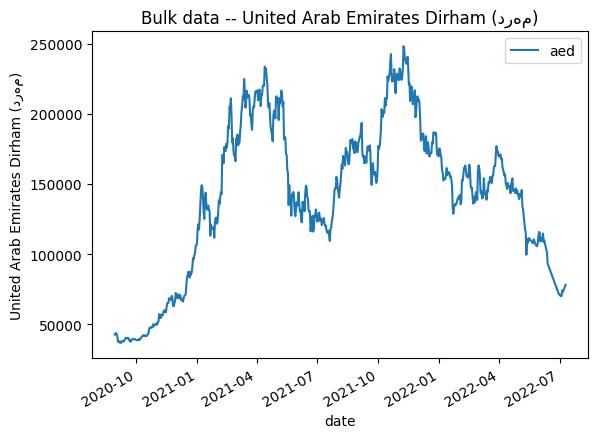

In [ ]:
import matplotlib.pyplot as plt

table = sqlio.read_sql_query("SELECT * FROM db_cap_datablock", conn)
money = {'usd':'US Dollars ($)','gbp':'British Pounds (£)','jpy':'Japanese Yen (¥)','rub':'Russian Ruble (₽)','aed':'United Arab Emirates Dirham (درهم)'}
print('\n')
cash = input('Which currency would you like to check? Please use the uncapitalised code(i.e., "usd" for US Dollars). For a list of currencies, please type "code"  --  ')
if cash == 'code':
  print('\n',money,'\n')
  cash = input('Which currency would you like to check? Please use the uncapitalised code  --  ')
else:
  cash = cash
table.plot(x='date',y=cash ,xlabel = 'date',ylabel = f'{money[cash]}',title = f'Bulk data -- {money[cash]}')

Databrick figures - recent updates

<ipython-input-27-2a641c1a99c4>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  table = sqlio.read_sql_query("SELECT * FROM db_cap_databrick", conn)




Which currency would you like to check? Please use the uncapitalised code(i.e., "usd" for US Dollars). For a list of currencies, please type "code"  --  aed


<Axes: title={'center': 'Update data -- United Arab Emirates Dirham (درهم)'}, xlabel='date', ylabel='United Arab Emirates Dirham (درهم)'>

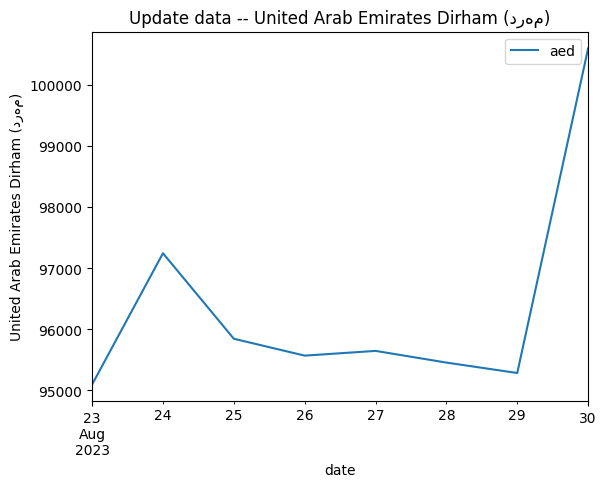

In [ ]:
table = sqlio.read_sql_query("SELECT * FROM db_cap_databrick", conn)
money = {'usd':'US Dollars ($)','gbp':'British Pounds (£)','jpy':'Japanese Yen (¥)','rub':'Russian Ruble (₽)','aed':'United Arab Emirates Dirham (درهم)'}
print('\n')
cash = input('Which currency would you like to check? Please use the uncapitalised code(i.e., "usd" for US Dollars). For a list of currencies, please type "code"  --  ')
if cash == 'code':
  print('\n',money,'\n')
  cash = input('Which currency would you like to check? Please use the uncapitalised code  --  ')
else:
  cash = cash
table.plot(x='date',y=cash ,xlabel = 'date',ylabel = f'{money[cash]}',title = f'Update data -- {money[cash]}')

In [ ]:
cur.close()
conn.close()